# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1

Подключите необходимые библиотеки.

In [57]:
### Ваш код здесь ###
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ядерная оценка плотности
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

C:\Users\natau\AppData\Local\Temp\ipykernel_13392\677587158.py:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


## Задание 2

Считайте данные и посмотрите на несколько строк.

In [58]:
### Ваш код здесь ###
df = pd.read_csv('data.csv')
df

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


## Задание 3

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [59]:
### Ваш код здесь ###
df.info() # выводим информацию о датафпейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

В данном датасете есть две числовые переменные:
- YearBuilt (первоначальная дата постройки - год);
- YearRemodAdd (дата реконструкции - год).

Также есть категориальная переменная DateSold (месяц и год продажи) - тип данных (object). Исползуя эти переменные создаем двае новые числовые переменные (Задание 5):
- age (возрост дома в годах). Расчитывается как разница года продажи (из DateSold) и первоночальной даты постройки (YearBuilt);
- age_RemodAdd_DateSold (сколько лет прошло с года продажи до года реконструкции).

In [60]:
# Преобразование тип данных object в datetime64[ns, UTC]#
df['DateSold'] = pd.to_datetime(df['DateSold'], utc=True)

C:\Users\natau\AppData\Local\Temp\ipykernel_13392\2045928462.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateSold'] = pd.to_datetime(df['DateSold'], utc=True)


In [61]:
df['DateSold_year'] = df['DateSold'].dt.year

In [62]:
# Создаем переменную возраст дома на дату продажи
df['age'] = df['DateSold_year'] - df['YearBuilt']

In [63]:
# Создаем переменную сколько лет прошло с реконструкции дома до даты продажи
df['age_RemodAdd_DateSold'] = df['DateSold_year'] - df['YearRemodAdd']

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   LotArea                1460 non-null   int64              
 1   LotArea_M              1460 non-null   float64            
 2   Street                 1460 non-null   object             
 3   BldgType               1460 non-null   object             
 4   OverallQual            1460 non-null   int64              
 5   OverallCond            1460 non-null   int64              
 6   YearBuilt              1460 non-null   int64              
 7   YearRemodAdd           1460 non-null   int64              
 8   RoofStyle              1460 non-null   object             
 9   ExterQual              1460 non-null   object             
 10  ExterCond              1460 non-null   object             
 11  Foundation             1460 non-null   object           

In [65]:
# создадим список названий числовых переменных
numerical_features = ['LotArea', 'LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'TotalBsmtSF', 'TotalBsmtSF_M', 'GrLivArea', 'GrLivArea_M', 'Bath', 'GarageArea', 'GarageArea_M', 'SalePrice', 'age', 'age_RemodAdd_DateSold']

numerical_stats = df[numerical_features].describe()
print(numerical_stats)

             LotArea     LotArea_M  OverallQual  OverallCond    YearBuilt  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    977.044879     6.099315     5.575342  1971.267808   
std      9981.264932    927.289456     1.382997     1.112799    30.202904   
min      1300.000000    120.773900     1.000000     1.000000  1872.000000   
25%      7553.500000    701.742811     5.000000     5.000000  1954.000000   
50%      9478.500000    880.581085     6.000000     5.000000  1973.000000   
75%     11601.500000   1077.814155     7.000000     6.000000  2000.000000   
max    215245.000000  19996.906235    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M    GrLivArea  GrLivArea_M  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452      98.238368  1515.463699   140.791124   
std       20.645407   438.705324      40.757041   525.480383    48.818704  

В новой переменной age_RemodAdd_DateSold минимальное значение равно -1. Это скорее всего ошибка в данных. Посмотрим на эту строку данных

In [66]:
df.loc[df['age_RemodAdd_DateSold'] == -1]

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice,DateSold_year,age,age_RemodAdd_DateSold
523,40094,3724.852882,Pave,1Fam,10,5,2007,2008,Hip,Ex,...,4,Ex,884,82.126252,2007-10-01 00:00:00+00:00,Partial,184750,2007,0,-1


Так как мы точно не знаем в каком признаке есть неточные данные, обнулим минимальное значение.

In [67]:
df.loc[df['age_RemodAdd_DateSold'] == -1, 'age_RemodAdd_DateSold'] = 0

In [68]:
df.age_RemodAdd_DateSold.describe()

count    1460.000000
mean       22.950685
std        20.639875
min         0.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: age_RemodAdd_DateSold, dtype: float64

Удалим из датафрэйма столбцы YearBuilt,	YearRemodAdd, DateSold и DateSold_year.


In [69]:
df_new = df.drop(['YearBuilt', 'YearRemodAdd', 'DateSold', 'DateSold_year'], axis= 1)
df_new

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,RoofStyle,ExterQual,ExterCond,Foundation,...,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,SaleCondition,SalePrice,age,age_RemodAdd_DateSold
0,8450,785.030350,Pave,1Fam,7,5,Gable,Gd,TA,PConc,...,1710,158.864130,3,Gd,548,50.910844,Normal,208500,5,5
1,9600,891.868800,Pave,1Fam,6,8,Gable,TA,TA,CBlock,...,1262,117.243586,2,TA,460,42.735380,Normal,181500,31,31
2,11250,1045.158750,Pave,1Fam,7,5,Gable,Gd,TA,PConc,...,1786,165.924758,3,Gd,608,56.485024,Normal,223500,7,6
3,9550,887.223650,Pave,1Fam,7,5,Gable,TA,TA,BrkTil,...,1717,159.514451,1,Gd,642,59.643726,Abnorml,140000,91,36
4,14260,1324.796780,Pave,1Fam,8,5,Gable,Gd,TA,PConc,...,2198,204.200794,3,Gd,836,77.666908,Normal,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,Gable,TA,TA,PConc,...,1647,153.011241,3,TA,460,42.735380,Normal,175000,8,7
1456,13175,1223.997025,Pave,1Fam,6,6,Gable,TA,TA,CBlock,...,2073,192.587919,2,TA,500,46.451500,Normal,210000,32,22
1457,9042,840.028926,Pave,1Fam,7,9,Gable,Ex,Gd,Stone,...,2340,217.393020,2,Gd,252,23.411556,Normal,266500,69,4
1458,9717,902.738451,Pave,1Fam,5,6,Hip,TA,TA,CBlock,...,1078,100.149434,1,Gd,240,22.296720,Normal,142125,60,14


In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   int64  
 1   LotArea_M              1460 non-null   float64
 2   Street                 1460 non-null   object 
 3   BldgType               1460 non-null   object 
 4   OverallQual            1460 non-null   int64  
 5   OverallCond            1460 non-null   int64  
 6   RoofStyle              1460 non-null   object 
 7   ExterQual              1460 non-null   object 
 8   ExterCond              1460 non-null   object 
 9   Foundation             1460 non-null   object 
 10  TotalBsmtSF            1460 non-null   int64  
 11  TotalBsmtSF_M          1460 non-null   float64
 12  Heating                1460 non-null   object 
 13  HeatingQC              1460 non-null   object 
 14  CentralAir             1460 non-null   object 
 15  GrLi

#### Анализ целевой переменной SalePrice - "Цена продажи"

In [71]:
# Создаем функцию (ядерная оценка плотности)
# Подбираем ширину окна
my_df = gaussian_kde(df_new['SalePrice'], bw_method=0.1)

Text(0.5, 1.0, 'Density Plot SalePrice')

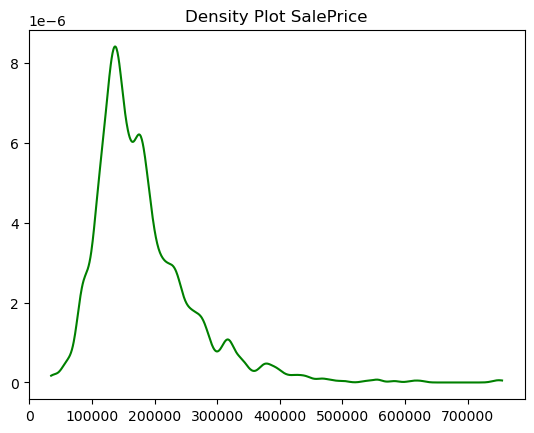

In [72]:
# График ядерной оценки плотности
x = linspace(min(df_new['SalePrice']), max(df_new['SalePrice']),1000)
plot(x, my_df(x), 'g')   # оценка плотности
plt.title('Density Plot SalePrice')

Из-за длинного хвоста вправо нам доволно сложно увидеть распределение, но ещё большее влияние он оказывает на модель: такое распределение может сильно её запутать, что приведет к недостаточно хорошему обучению.
Одним из способов решения этой проблемы служит лагарифмическое преобразование. Применив функцию log к цене продажи, мы устраним этот нежелательный эффект.
Очевидно, что нулевых значений в цене нет. Добавление 1 важно когда в данных имеются нули.

In [73]:
df_new['SalePrice']=np.log1p(df_new['SalePrice'])

In [74]:
my_df = gaussian_kde(df_new['SalePrice'], bw_method=0.1)

Text(0.5, 1.0, 'Density Plot Log(SalePrice)')

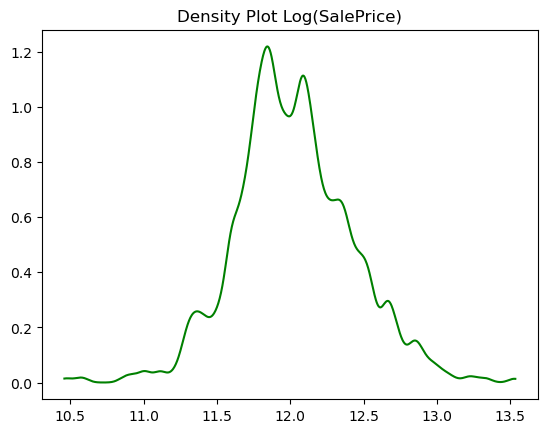

In [75]:
x = linspace(min(df_new['SalePrice']), max(df_new['SalePrice']),1000)
plot(x, my_df(x), 'g')   # оценка плотности
plt.title('Density Plot Log(SalePrice)')

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [76]:
### Ваш код здесь ###
# создадим измененный список названий числовых переменных
numerical_features_new = ['LotArea', 'LotArea_M', 'OverallQual', 'OverallCond','TotalBsmtSF',
                          'TotalBsmtSF_M', 'GrLivArea', 'GrLivArea_M', 'Bath', 'GarageArea', 'GarageArea_M', 'SalePrice', 'age', 'age_RemodAdd_DateSold']

                       LotArea  LotArea_M  OverallQual  OverallCond  \
LotArea                   1.00       1.00         0.11        -0.01   
LotArea_M                 1.00       1.00         0.11        -0.01   
OverallQual               0.11       0.11         1.00        -0.09   
OverallCond              -0.01      -0.01        -0.09         1.00   
TotalBsmtSF               0.26       0.26         0.54        -0.17   
TotalBsmtSF_M             0.26       0.26         0.54        -0.17   
GrLivArea                 0.26       0.26         0.59        -0.08   
GrLivArea_M               0.26       0.26         0.59        -0.08   
Bath                      0.10       0.10         0.55        -0.17   
GarageArea                0.18       0.18         0.56        -0.15   
GarageArea_M              0.18       0.18         0.56        -0.15   
SalePrice                 0.26       0.26         0.82        -0.04   
age                      -0.01      -0.01        -0.57         0.38   
age_Re

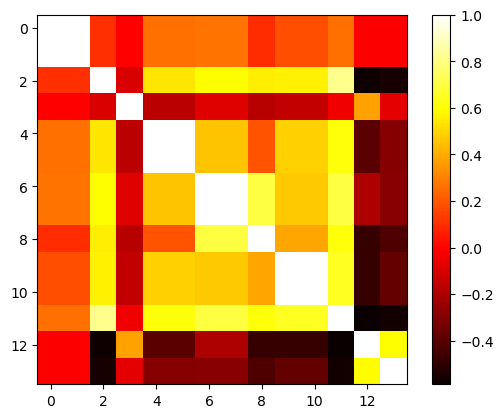

In [77]:
# Построение матрицы корреляций
correlation_matrix = df_new[numerical_features_new].corr()

# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
print('\n Матрица корелляций')
# Отображение тепловой карты
plt.show()

In [78]:
# Установка порога для определения линейно-зависимых признаков
threshold = 0.9

# Поиск линейно-зависимых признаков
linearly_dependent_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            linearly_dependent_features.add(feature_i)
            linearly_dependent_features.add(feature_j)

# Вывод линейно-зависимых признаков
print("Линейно-зависимые признаки:")
print(linearly_dependent_features)

Линейно-зависимые признаки:
{'LotArea', 'GrLivArea_M', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'GarageArea_M', 'TotalBsmtSF_M', 'LotArea_M'}


               LotArea  GrLivArea_M  TotalBsmtSF  GarageArea  GrLivArea  \
LotArea           1.00         0.26         0.26        0.18       0.26   
GrLivArea_M       0.26         1.00         0.45        0.47       1.00   
TotalBsmtSF       0.26         0.45         1.00        0.49       0.45   
GarageArea        0.18         0.47         0.49        1.00       0.47   
GrLivArea         0.26         1.00         0.45        0.47       1.00   
GarageArea_M      0.18         0.47         0.49        1.00       0.47   
TotalBsmtSF_M     0.26         0.45         1.00        0.49       0.45   
LotArea_M         1.00         0.26         0.26        0.18       0.26   

               GarageArea_M  TotalBsmtSF_M  LotArea_M  
LotArea                0.18           0.26       1.00  
GrLivArea_M            0.47           0.45       0.26  
TotalBsmtSF            0.49           1.00       0.26  
GarageArea             1.00           0.49       0.18  
GrLivArea              0.47           0.45  

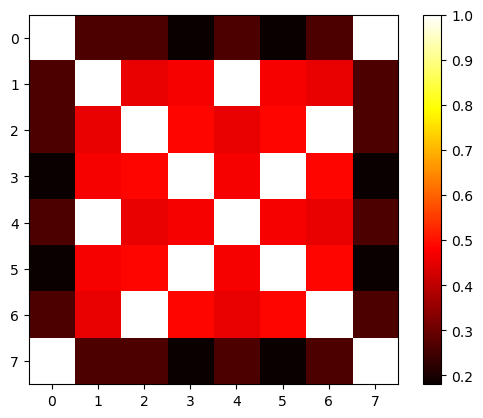

In [79]:
# Построение матрицы корреляций
correlation_matrix = df_new[list(linearly_dependent_features)].corr()

# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
print('\n Матрица корелляций линейно-зависимых признаков')
# Отображение тепловой карты
plt.show()

In [80]:
# Список линейно-зависимых признаков (удалим площадь в м. кв., оставим  в футах)
linear_dependent_features = ['TotalBsmtSF_M', 'GarageArea_M', 'LotArea_M', 'GrLivArea_M'] #  или ['TotalBsmtSF', 'GarageArea', 'LotArea', 'GrLivArea']

# Удалите линейно-зависимые признаки из датафрейма
df_new = df_new.drop(linear_dependent_features, axis=1)

In [81]:
df_new

,LotArea,Street,BldgType,OverallQual,OverallCond,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,...,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice,age,age_RemodAdd_DateSold
0,8450,Pave,1Fam,7,5,Gable,Gd,TA,PConc,856,...,Ex,Y,1710,3,Gd,548,Normal,12.247699,5,5
1,9600,Pave,1Fam,6,8,Gable,TA,TA,CBlock,1262,...,Ex,Y,1262,2,TA,460,Normal,12.109016,31,31
2,11250,Pave,1Fam,7,5,Gable,Gd,TA,PConc,920,...,Ex,Y,1786,3,Gd,608,Normal,12.317171,7,6
3,9550,Pave,1Fam,7,5,Gable,TA,TA,BrkTil,756,...,Gd,Y,1717,1,Gd,642,Abnorml,11.849405,91,36
4,14260,Pave,1Fam,8,5,Gable,Gd,TA,PConc,1145,...,Ex,Y,2198,3,Gd,836,Normal,12.429220,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,Pave,1Fam,6,5,Gable,TA,TA,PConc,953,...,Ex,Y,1647,3,TA,460,Normal,12.072547,8,7
1456,13175,Pave,1Fam,6,6,Gable,TA,TA,CBlock,1542,...,TA,Y,2073,2,TA,500,Normal,12.254868,32,22
1457,9042,Pave,1Fam,7,9,Gable,Ex,Gd,Stone,1152,...,Ex,Y,2340,2,Gd,252,Normal,12.493133,69,4
1458,9717,Pave,1Fam,5,6,Hip,TA,TA,CBlock,1078,...,Gd,Y,1078,1,Gd,240,Normal,11.864469,60,14


In [82]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   int64  
 1   Street                 1460 non-null   object 
 2   BldgType               1460 non-null   object 
 3   OverallQual            1460 non-null   int64  
 4   OverallCond            1460 non-null   int64  
 5   RoofStyle              1460 non-null   object 
 6   ExterQual              1460 non-null   object 
 7   ExterCond              1460 non-null   object 
 8   Foundation             1460 non-null   object 
 9   TotalBsmtSF            1460 non-null   int64  
 10  Heating                1460 non-null   object 
 11  HeatingQC              1460 non-null   object 
 12  CentralAir             1460 non-null   object 
 13  GrLivArea              1460 non-null   int64  
 14  Bath                   1460 non-null   int64  
 15  Kitc

In [83]:
#Скорректируем список числовых данных
numerical_features_final = ['LotArea', 'OverallQual', 'OverallCond','TotalBsmtSF', 'GrLivArea',
                            'Bath', 'GarageArea', 'SalePrice', 'age', 'age_RemodAdd_DateSold']

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

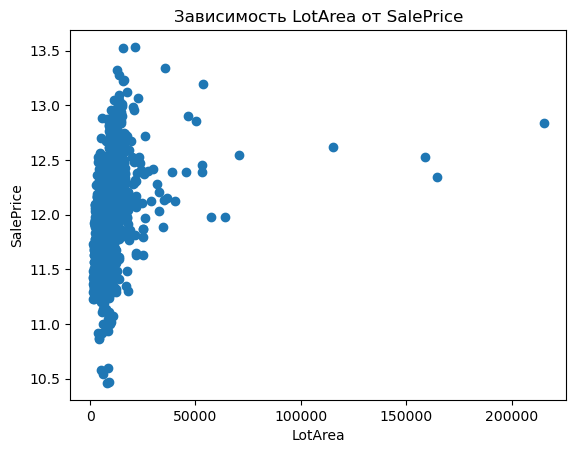

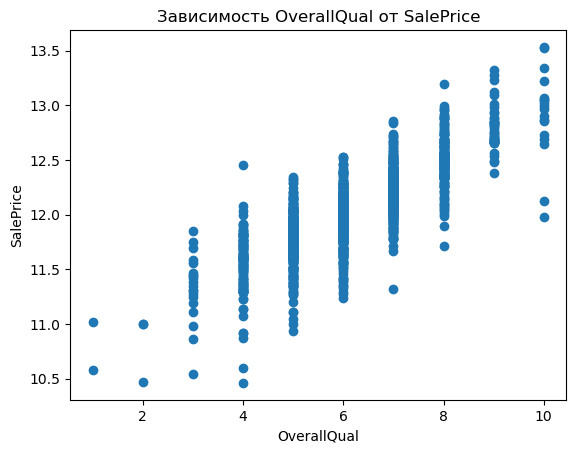

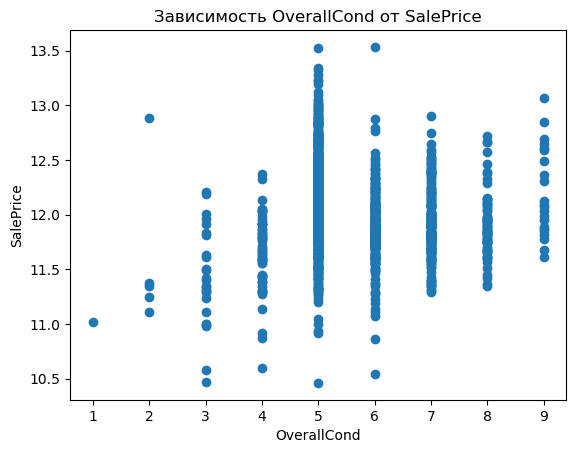

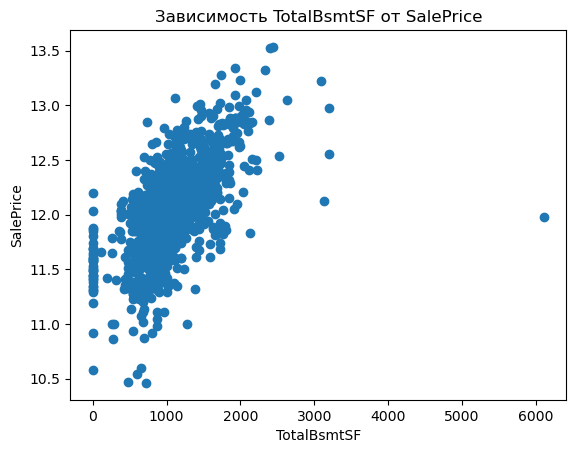

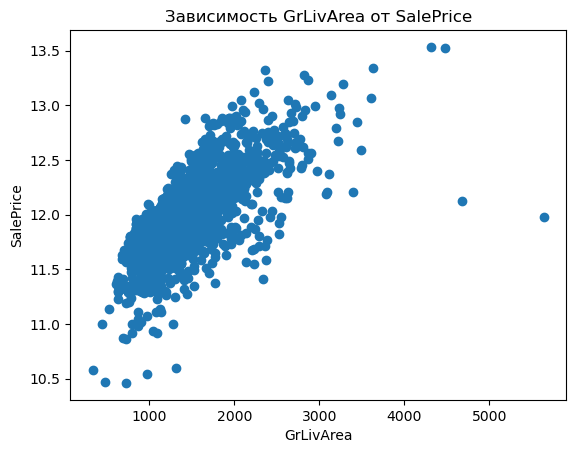

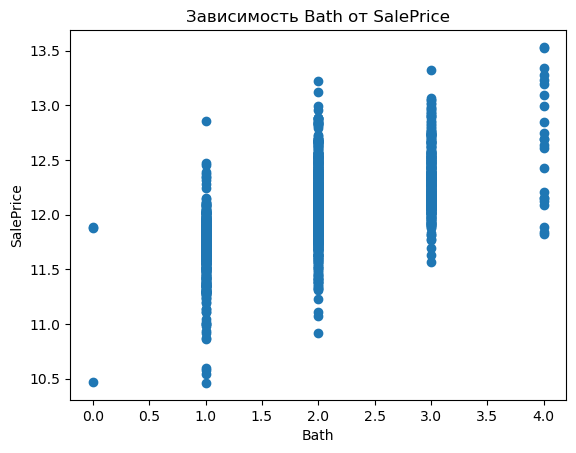

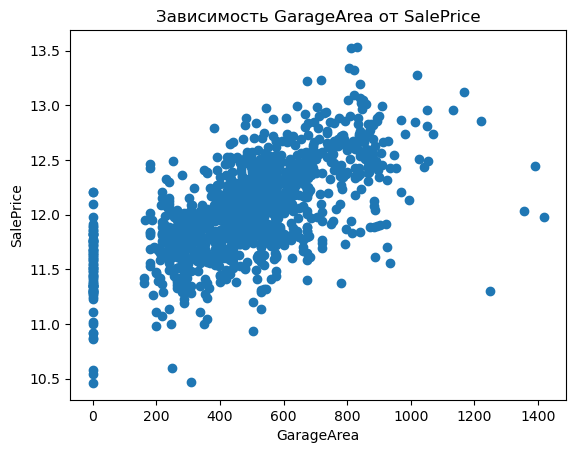

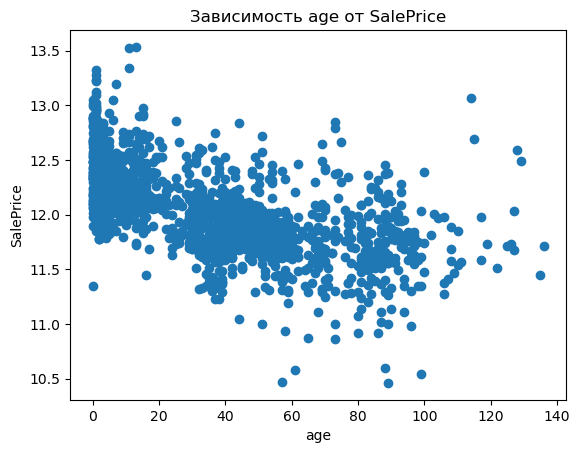

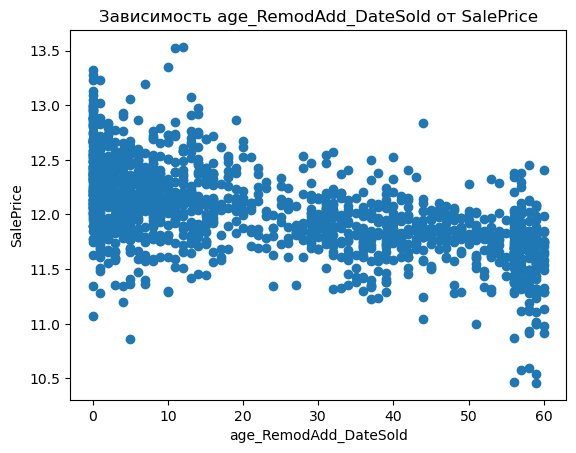

In [84]:
### Ваш код здесь ###
# Построение графиков
for variable in df_new[numerical_features_final]:
    if variable != 'SalePrice':
        plt.scatter(df_new[variable], df_new['SalePrice'])
        plt.xlabel(variable)
        plt.ylabel('SalePrice')
        plt.title(f'Зависимость {variable} от SalePrice')
        plt.show();


Считаю целесообразным для числовых данных  построить диаграммы ядерного распределения плотности, , чтобы проанализировать их распределение.


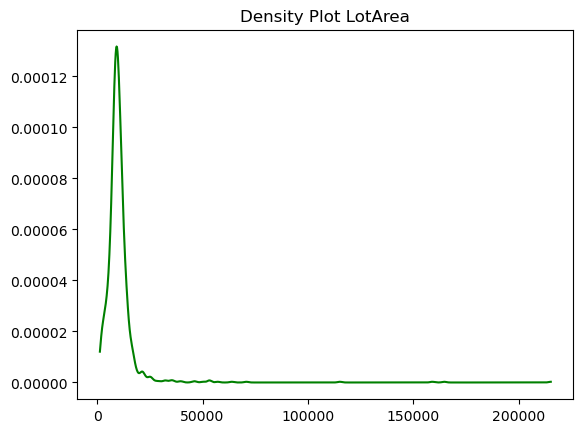

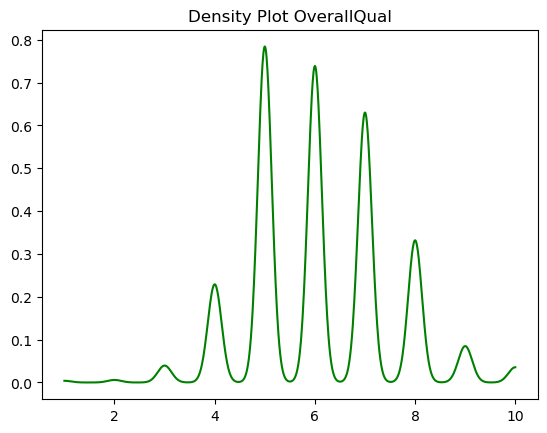

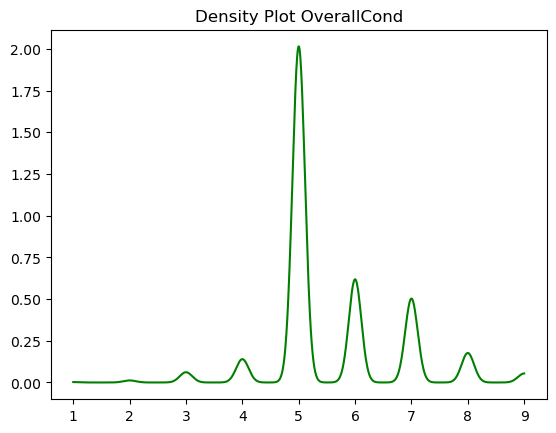

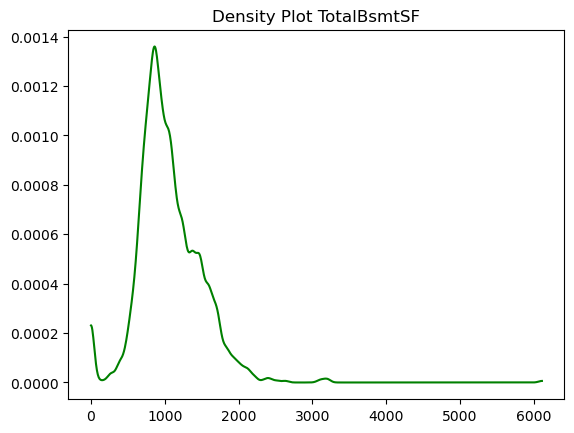

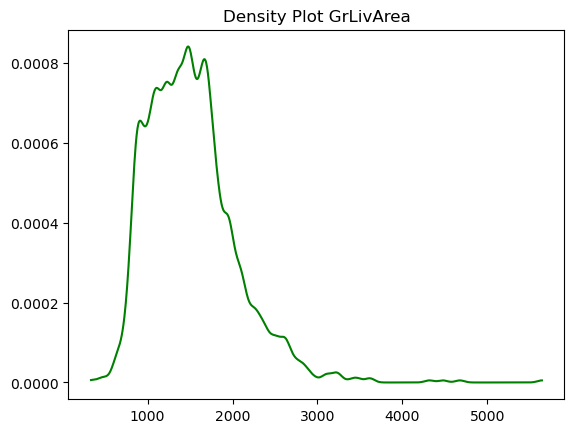

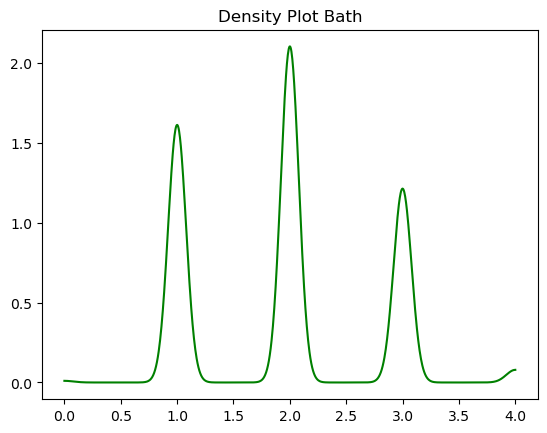

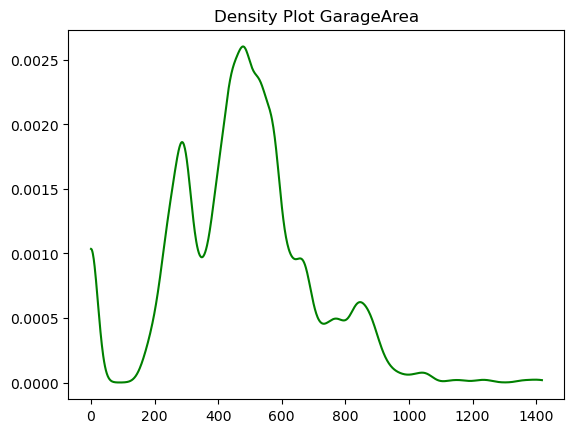

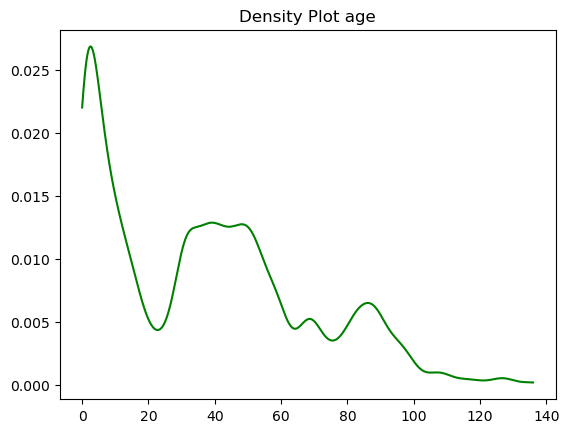

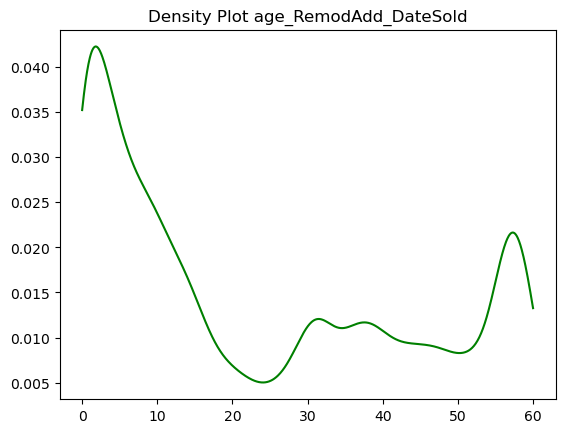

In [85]:
# Создаем функцию (ядерная оценка плотности)
# Подбираем ширину окна
for variable in df_new[numerical_features_final]:
    if variable != 'SalePrice':
        my_df1 = gaussian_kde(df_new[variable], bw_method=0.1)
        x = linspace(min(df_new[variable]), max(df_new[variable]),1000)
        plot(x, my_df1(x), 'g')
        plt.title(f'Density Plot {variable}')
        plt.show();

4. Сделайте предварительные выводы.

При исследовании числовых признаков были выявлены и удалены мультиколлинеарные признаки. Анализ числовых признаков показывает их влияние на цену. У числовых признаков наблюдаются длинные хвосты вправо.

По аналогии с целевой переменной используем «логарифмическое преобразование». Добовляем 1 в логарифмическую функцию преобразования.

In [86]:
for variable in df_new[numerical_features_final]:
    if variable != 'SalePrice':
        df_new[variable]=np.log1p(df[variable] + 1)

In [87]:
df_new

,LotArea,Street,BldgType,OverallQual,OverallCond,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,...,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice,age,age_RemodAdd_DateSold
0,9.042158,Pave,1Fam,2.197225,1.945910,Gable,Gd,TA,PConc,6.754604,...,Ex,Y,7.445418,1.609438,Gd,6.309918,Normal,12.247699,1.945910,1.945910
1,9.169727,Pave,1Fam,2.079442,2.302585,Gable,TA,TA,CBlock,7.142037,...,Ex,Y,7.142037,1.386294,TA,6.135565,Normal,12.109016,3.496508,3.496508
2,9.328301,Pave,1Fam,2.197225,1.945910,Gable,Gd,TA,PConc,6.826545,...,Ex,Y,7.488853,1.609438,Gd,6.413459,Normal,12.317171,2.197225,2.079442
3,9.164506,Pave,1Fam,2.197225,1.945910,Gable,TA,TA,BrkTil,6.630683,...,Gd,Y,7.449498,1.098612,Gd,6.467699,Abnorml,11.849405,4.532599,3.637586
4,9.565354,Pave,1Fam,2.302585,1.945910,Gable,Gd,TA,PConc,7.044905,...,Ex,Y,7.696213,1.609438,Gd,6.731018,Normal,12.429220,2.302585,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.977020,Pave,1Fam,2.079442,1.945910,Gable,TA,TA,PConc,6.861711,...,Ex,Y,7.407924,1.609438,TA,6.135565,Normal,12.072547,2.302585,2.197225
1456,9.486228,Pave,1Fam,2.079442,2.079442,Gable,TA,TA,CBlock,7.342132,...,TA,Y,7.637716,1.386294,TA,6.218600,Normal,12.254868,3.526361,3.178054
1457,9.109857,Pave,1Fam,2.197225,2.397895,Gable,Ex,Gd,Stone,7.050989,...,Ex,Y,7.758761,1.386294,Gd,5.537334,Normal,12.493133,4.262680,1.791759
1458,9.181838,Pave,1Fam,1.945910,2.079442,Hip,TA,TA,CBlock,6.984716,...,Gd,Y,6.984716,1.098612,Gd,5.488938,Normal,11.864469,4.127134,2.772589


Преобразование котегориальныых переменных

Для преобразования котегориальных данных используем LabelEncoder

In [88]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


for col in df_new.columns:
    if(df_new[col].dtype == 'object'):
        le = LabelEncoder()
        df_new[col] = le.fit_transform(df_new[col])
        


In [89]:
df_new

,LotArea,Street,BldgType,OverallQual,OverallCond,RoofStyle,ExterQual,ExterCond,Foundation,TotalBsmtSF,...,HeatingQC,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice,age,age_RemodAdd_DateSold
0,9.042158,1,0,2.197225,1.945910,1,2,4,2,6.754604,...,0,1,7.445418,1.609438,2,6.309918,4,12.247699,1.945910,1.945910
1,9.169727,1,0,2.079442,2.302585,1,3,4,1,7.142037,...,0,1,7.142037,1.386294,3,6.135565,4,12.109016,3.496508,3.496508
2,9.328301,1,0,2.197225,1.945910,1,2,4,2,6.826545,...,0,1,7.488853,1.609438,2,6.413459,4,12.317171,2.197225,2.079442
3,9.164506,1,0,2.197225,1.945910,1,3,4,0,6.630683,...,2,1,7.449498,1.098612,2,6.467699,0,11.849405,4.532599,3.637586
4,9.565354,1,0,2.302585,1.945910,1,2,4,2,7.044905,...,0,1,7.696213,1.609438,2,6.731018,4,12.429220,2.302585,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.977020,1,0,2.079442,1.945910,1,3,4,2,6.861711,...,0,1,7.407924,1.609438,3,6.135565,4,12.072547,2.302585,2.197225
1456,9.486228,1,0,2.079442,2.079442,1,3,4,1,7.342132,...,4,1,7.637716,1.386294,3,6.218600,4,12.254868,3.526361,3.178054
1457,9.109857,1,0,2.197225,2.397895,1,0,2,4,7.050989,...,0,1,7.758761,1.386294,2,5.537334,4,12.493133,4.262680,1.791759
1458,9.181838,1,0,1.945910,2.079442,3,3,4,1,6.984716,...,2,1,6.984716,1.098612,2,5.488938,4,11.864469,4.127134,2.772589


In [90]:
# Сохранение файла данных для последующего моделирования
df_new.to_csv('df_new.csv', index = False)

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

Дополнительные переменные age(возраст дома) и age_RemodAdd_DateSold (сколько лет прошло от реконструкции дома до продажи) были созданы в начале 3 задания. Был проведен анализ зависимости целевой переменной SalePrice (Цена продажи) от новых переменных. Прослеживается линейная зависимость.

## Задание 4

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [91]:
### Ваш код здесь ###
from sklearn.model_selection import train_test_split


#Загрузим файл с преобразованными данными
df_prepared = pd.read_csv('df_new.csv')

In [92]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_prepared.drop('SalePrice', axis=1)
y = df_prepared['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [93]:
### Ваш код здесь ###
##Закодировал в задании 3

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [94]:
### Ваш код здесь ###
##Числовые признаки подготовила и привела к единому масштабу (логарифмическое преобразование) в задании 3

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [95]:
### Ваш код здесь ###
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод весов модели
print("Weights of the model:")
for feature, weight in zip(X.columns, model.coef_):
    print(f"{feature}: {weight}")

# Предсказание на тренировочной и тестовой выборках
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Вычисление среднеквадратичной ошибки
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

# Вывод среднеквадратичной ошибки
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

#Вычисление  коэффициента детерминации
train_r2 = r2_score(y_train, y_predict_train)
test_r2 = r2_score(y_test, y_predict_test)

# Вывод коэффициента детерминации
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Weights of the model:
LotArea: 0.14683864258280938
Street: -0.01383721558892613
BldgType: 0.007013375796950397
OverallQual: 0.5817387099624675
OverallCond: 0.27757295865589776
RoofStyle: 0.013052875606951935
ExterQual: -0.0315971105989217
ExterCond: 0.012274555800917355
Foundation: 0.027941091268959804
TotalBsmtSF: 0.029561693904377715
Heating: 0.002808906893090976
HeatingQC: -0.004458426618108059
CentralAir: 0.14111061677669476
GrLivArea: 0.3449451861487649
Bath: 0.06548504579352415
KitchenQual: -0.041954621076964155
GarageArea: 0.030274027083065657
SaleCondition: 0.01314346569189034
age: -0.05775482945208788
age_RemodAdd_DateSold: 0.00240769009858366
Train MSE: 0.02333299999086619
Test MSE: 0.022817910897854902
Train R2: 0.8494680531518901
Test R2: 0.8654952799071516


In [97]:
# Получите веса модели
weights = model.coef_

# Отсортируйте веса в порядке убывания
sorted_weights = sorted(weights, reverse=True)

# Выведите веса в порядке убывания
print("Weights in descending order:")
for weight in sorted_weights:
    print(weight)

Weights in descending order:
0.5817387099624675
0.3449451861487649
0.27757295865589776
0.14683864258280938
0.14111061677669476
0.06548504579352415
0.030274027083065657
0.029561693904377715
0.027941091268959804
0.01314346569189034
0.013052875606951935
0.012274555800917355
0.007013375796950397
0.002808906893090976
0.00240769009858366
-0.004458426618108059
-0.01383721558892613
-0.0315971105989217
-0.041954621076964155
-0.05775482945208788


In [98]:

# Создайте список пар (название признака, вес)
feature_weights = list(zip(X.columns, weights))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Создайте отдельный датафрейм с названиями признаков и их весами
weights_df = pd.DataFrame(sorted_feature_weights, columns=['Feature', 'Weight'])

# Округлите веса до 5 цифр после запятой
weights_df['Weight'] = weights_df['Weight'].round(5)

# Выведите датафрейм с названиями признаков и их весами
print(weights_df)

                  Feature   Weight
0             OverallQual  0.58174
1               GrLivArea  0.34495
2             OverallCond  0.27757
3                 LotArea  0.14684
4              CentralAir  0.14111
5                    Bath  0.06549
6              GarageArea  0.03027
7             TotalBsmtSF  0.02956
8              Foundation  0.02794
9           SaleCondition  0.01314
10              RoofStyle  0.01305
11              ExterCond  0.01227
12               BldgType  0.00701
13                Heating  0.00281
14  age_RemodAdd_DateSold  0.00241
15              HeatingQC -0.00446
16                 Street -0.01384
17              ExterQual -0.03160
18            KitchenQual -0.04195
19                    age -0.05775


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [99]:
### Ваш код здесь ###
# Создание и обучение модели
lasso_regression = Lasso(alpha=0.1, random_state=42) # alpha — величина регуляризации

# обучение
lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [100]:
# вывод точности предсказания
print(lasso_regression.score(X_train, y_train))
print(lasso_regression.score(X_test, y_test))

0.4290591834666605
0.4119181199482287


Функция np.logspace() из библиотеки NumPy используется для генерации чисел в логарифмической шкале. Она принимает три аргумента: start, stop и num.
start: это начальное значение логарифма, которое будет использоваться для генерации чисел. В нашем случае, start равен -3, что означает, что мы начинаем с логарифма значения 10 в степени -3, то есть 0.001.
stop: это конечное значение логарифма, которое будет использоваться для генерации чисел. В нашем случае, stop равен 3, что означает, что мы заканчиваем на логарифме значения 10 в степени 3, то есть 1000.
num: это количество чисел, которые будут сгенерированы в логарифмической шкале между start и stop. В нашем случае, num равен 100, поэтому будет сгенерировано 100 чисел.
Таким образом, np.logspace(-3, 3, num=7) создает список из 100 чисел, равномерно распределенных в логарифмической шкале от 0.001 до 1000. Это позволяет нам проверить значения alpha в широком диапазоне, начиная от очень маленьких (0.001) до очень больших (1000).

In [101]:
# Задайте список значений alpha, которые вы хотите проверить
alpha_values = np.logspace(-3, 3, num=500)

# Создайте объект модели Lasso
lasso_model = Lasso()

# Создайте объект GridSearchCV для подбора параметра alpha
grid_search = GridSearchCV(lasso_model, {'alpha': alpha_values}, cv=5)

# Обучите модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Выведите наилучшее значение alpha
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 0.001


In [102]:
# Обучаем модель с наилучшим значением alpha
model = Lasso(alpha=0.001, random_state=42)
model.fit(X_train, y_train)

# Вывод весов модели
print("Weights of the model:")
for feature, weight in zip(X.columns, model.coef_):
    print(f"{feature}: {weight}")

# Предсказание на тренировочной и тестовой выборках
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Вычисление среднеквадратичной ошибки
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

# Вывод среднеквадратичной ошибки
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

#Вычисление  коэффициента детерминации
train_r2 = r2_score(y_train, y_predict_train)
test_r2 = r2_score(y_test, y_predict_test)

# Вывод коэффициента детерминации
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Weights of the model:
LotArea: 0.14069967908004424
Street: -0.0
BldgType: 0.005034558314566026
OverallQual: 0.5422710282494737
OverallCond: 0.21926506610000462
RoofStyle: 0.012349953575121246
ExterQual: -0.03097970650190691
ExterCond: 0.010390414470502323
Foundation: 0.02523694258101956
TotalBsmtSF: 0.02992033001745238
Heating: -0.0
HeatingQC: -0.005111368810825808
CentralAir: 0.13454730797650233
GrLivArea: 0.35998052851787093
Bath: 0.03032269927020206
KitchenQual: -0.04186344384582989
GarageArea: 0.032406948176541286
SaleCondition: 0.013209934866436958
age: -0.05779347564038964
age_RemodAdd_DateSold: -0.0018634364822291145
Train MSE: 0.023464267047947362
Test MSE: 0.02329275759840077
Train R2: 0.8486211888109487
Test R2: 0.8626962014625978


In [103]:
# Получите веса модели
weights = model.coef_

# Отсортируйте веса в порядке убывания
sorted_weights = sorted(weights, reverse=True)

# Выведите веса в порядке убывания
print("Weights in descending order:")
for weight in sorted_weights:
    print(weight)

Weights in descending order:
0.5422710282494737
0.35998052851787093
0.21926506610000462
0.14069967908004424
0.13454730797650233
0.032406948176541286
0.03032269927020206
0.02992033001745238
0.02523694258101956
0.013209934866436958
0.012349953575121246
0.010390414470502323
0.005034558314566026
-0.0
-0.0
-0.0018634364822291145
-0.005111368810825808
-0.03097970650190691
-0.04186344384582989
-0.05779347564038964


In [104]:
# Создайте список пар (название признака, вес)
feature_weights = list(zip(X.columns, weights))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Создайте отдельный датафрейм с названиями признаков и их весами
weights_df = pd.DataFrame(sorted_feature_weights, columns=['Feature', 'Weight'])

# Округлите веса до 5 цифр после запятой
weights_df['Weight'] = weights_df['Weight'].round(5)

# Выведите датафрейм с названиями признаков и их весами
print(weights_df)

                  Feature   Weight
0             OverallQual  0.54227
1               GrLivArea  0.35998
2             OverallCond  0.21927
3                 LotArea  0.14070
4              CentralAir  0.13455
5              GarageArea  0.03241
6                    Bath  0.03032
7             TotalBsmtSF  0.02992
8              Foundation  0.02524
9           SaleCondition  0.01321
10              RoofStyle  0.01235
11              ExterCond  0.01039
12               BldgType  0.00503
13                 Street -0.00000
14                Heating -0.00000
15  age_RemodAdd_DateSold -0.00186
16              HeatingQC -0.00511
17              ExterQual -0.03098
18            KitchenQual -0.04186
19                    age -0.05779


Посмотрите на веса полученной модели. Какой вывод можно сделать?

Веса модели  с L1-регуляризацией снизили. У переменных Street и Heating веса обнулились. При этом качество модели незначитеельно ухудшилось. Исходные числовые переменные были изночально нормализованы логарифмическим преобразованием. Я считаю, что в данном случаe дополнительная регулиризация усложнила модель и снизила её эффективность.

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [105]:
### Ваш код здесь ###
ridge_regression = Ridge(alpha=0.1, random_state=42)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=42)

In [106]:
# вывод точности предсказания
print(ridge_regression.score(X_train, y_train))
print(ridge_regression.score(X_test, y_test))

0.8494663923971191
0.8654439482802512


In [107]:
# Задайте список значений alpha, которые вы хотите проверить
alpha_values = np.logspace(-3, 3, num=100)

# Создайте объект модели Lasso
ridge_model = Ridge() #lasso_model = Lasso()

# Создайте объект GridSearchCV для подбора параметра alpha
grid_search = GridSearchCV(ridge_model, {'alpha': alpha_values}, cv=5)

# Обучите модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Выведите наилучшее значение alpha
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 1.629750834620645


In [108]:
# Обучаем модель с наилучшим значением alpha
model = Ridge(alpha=1.63, random_state=42)
model.fit(X_train, y_train)

# Вывод весов модели
print("Weights of the model:")
for feature, weight in zip(X.columns, model.coef_):
    print(f"{feature}: {weight}")

# Предсказание на тренировочной и тестовой выборках
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Вычисление среднеквадратичной ошибки
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

# Вывод среднеквадратичной ошибки
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

#Вычисление  коэффициента детерминации
train_r2 = r2_score(y_train, y_predict_train)
test_r2 = r2_score(y_test, y_predict_test)

# Вывод коэффициента детерминации
print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Weights of the model:
LotArea: 0.14646059100276718
Street: -0.008680689266291335
BldgType: 0.0069524675410177475
OverallQual: 0.5208590697559217
OverallCond: 0.2609260836985128
RoofStyle: 0.014031875509690168
ExterQual: -0.033428883275222164
ExterCond: 0.012306476850888487
Foundation: 0.027645241044420614
TotalBsmtSF: 0.031458116043135864
Heating: 0.0020863160790821848
HeatingQC: -0.0048974958429764065
CentralAir: 0.1423612875913571
GrLivArea: 0.34580900423946376
Bath: 0.0750921796034175
KitchenQual: -0.043706152529619124
GarageArea: 0.03184471327070765
SaleCondition: 0.013295378517333489
age: -0.05771047669438429
age_RemodAdd_DateSold: 0.00045192892303878287
Train MSE: 0.02338834830788705
Test MSE: 0.023014769053710964
Train R2: 0.8491109756256751
Test R2: 0.8643348603021341


In [109]:
# Получите веса модели
weights = model.coef_

# Отсортируйте веса в порядке убывания
sorted_weights = sorted(weights, reverse=True)

# Выведите веса в порядке убывания
print("Weights in descending order:")
for weight in sorted_weights:
    print(weight)

Weights in descending order:
0.5208590697559217
0.34580900423946376
0.2609260836985128
0.14646059100276718
0.1423612875913571
0.0750921796034175
0.03184471327070765
0.031458116043135864
0.027645241044420614
0.014031875509690168
0.013295378517333489
0.012306476850888487
0.0069524675410177475
0.0020863160790821848
0.00045192892303878287
-0.0048974958429764065
-0.008680689266291335
-0.033428883275222164
-0.043706152529619124
-0.05771047669438429


In [110]:
# Создайте список пар (название признака, вес)
feature_weights = list(zip(X.columns, weights))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Создайте отдельный датафрейм с названиями признаков и их весами
weights_df = pd.DataFrame(sorted_feature_weights, columns=['Feature', 'Weight'])

# Округлите веса до 5 цифр после запятой
weights_df['Weight'] = weights_df['Weight'].round(5)

# Выведите датафрейм с названиями признаков и их весами
print(weights_df)

                  Feature   Weight
0             OverallQual  0.52086
1               GrLivArea  0.34581
2             OverallCond  0.26093
3                 LotArea  0.14646
4              CentralAir  0.14236
5                    Bath  0.07509
6              GarageArea  0.03184
7             TotalBsmtSF  0.03146
8              Foundation  0.02765
9               RoofStyle  0.01403
10          SaleCondition  0.01330
11              ExterCond  0.01231
12               BldgType  0.00695
13                Heating  0.00209
14  age_RemodAdd_DateSold  0.00045
15              HeatingQC -0.00490
16                 Street -0.00868
17              ExterQual -0.03343
18            KitchenQual -0.04371
19                    age -0.05771


Посмотрите на веса полученной модели. Какой вывод можно сделать?

При L2-регуляризации веса полученной модели снижены равномерно без абсолютного обнуления. L2-регуляризация делает модель более "гладкой" и менее подверженной влиянию шума в данных.

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

В последней обученной модели признаки  с наибольшими положительными коэффициентами:
- OverallQual(общее качество материала и отделки) = 0.52086;
- GrLivArea(жилая площадь в квадратных футах) = 0.34581;
- OverallCond(общая оценка состояния) = 0.26093


Утверждение, что чем больше значения этих признаков, тем больше сумма сделки статистически подтверждается.


2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

В последней обученной модели признаки с наибольшими отрицательными коэффициентами:
- age(возраст дома - сконструированный мной признак) = - 0.05771
- KitchenQual(качество кухни)= -0.04371
- ExterQual(качество материалов снаружи) =  -0.03343


Утверждение, что чем больше значения этих признаков, тем меньше сумма сделки статистически подтверждается.  

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

Утверждение, что сумма сделки от этих признаков не зависит статистически подтверждается.

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации.